In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numexpr as ne
import seaborn as sns

sns.set()
%matplotlib inline

**Series object**

In [ ]:
population_dict= {
    'Cal':100000,
    'NY':500000,
    'IL':234000,
    'TX':35640
}

In [18]:
pop_series=pd.Series(population_dict)
pop_series.mean()                                    #can perform math functions on series
pop_series['NY':'TX']

NY    500000
IL    234000
TX     35640
dtype: int64

In [12]:
pd.Series(5, index=['a','b','c'])        #same element and set index

a    5
b    5
c    5
dtype: int64

In [14]:
pd.Series({1:'a',2:'b',3:'c'})        #series from dict

1    a
2    b
3    c
dtype: object

In [66]:
#pop_series
pop_series.keys()
print(pop_series.values)
print(pop_series.items)
print('------------')
print(pop_series)

[100000 500000 234000  35640]
<bound method Series.items of Cal    100000
NY     500000
IL     234000
TX      35640
dtype: int64>
------------
Cal    100000
NY     500000
IL     234000
TX      35640
dtype: int64


In [57]:
pop_series[['NY','IL']]

NY    500000
IL    234000
dtype: int64

In [60]:
pop_series[pop_series>200000]

NY    500000
IL    234000
dtype: int64

In [64]:
pop_series.iloc[2]

234000

In [67]:
pop_series.loc['NY']

500000

**Dataframes**

In [20]:
area_dict= {'Cal':423967,'NY':141297,'TX':987432,'IL':9835}
area_series= pd.Series(area_dict)
area_series

Cal    423967
NY     141297
TX     987432
IL       9835
dtype: int64

In [21]:
states=pd.DataFrame({'popultaion':pop_series,
                    'area':area_series})                   #create DF where column names are population and area, and data are the series

states

,popultaion,area
Cal,100000,423967
IL,234000,9835
NY,500000,141297
TX,35640,987432


In [34]:
states
states.rename(columns= {'Population':'State Population'})

,State Population,Area
Cal,100000,423967
IL,234000,9835
NY,500000,141297
TX,35640,987432


In [35]:
states['Area']

Cal    423967
IL       9835
NY     141297
TX     987432
Name: Area, dtype: int64

In [37]:
states [ states['Area']>10000 ]               #get actual data where area > 10000

,Population,Area
Cal,100000,423967
NY,500000,141297
TX,35640,987432


In [68]:
states['Population']

Cal    100000
IL     234000
NY     500000
TX      35640
Name: Population, dtype: int64

In [73]:
states['Density']= states['Population']/ states['Area']           #add a new column using other columns

In [75]:
states.T                 #transpose, make rows columns and columns rows

,Cal,IL,NY,TX
Population,100000.000000,234000.000000,500000.000000,35640.000000
Area,423967.000000,9835.000000,141297.000000,987432.000000
Density,0.235867,23.792578,3.538646,0.036094


In [78]:
print(states)
states.iloc[:3,:2]

     Population    Area    Density
Cal      100000  423967   0.235867
IL       234000    9835  23.792578
NY       500000  141297   3.538646
TX        35640  987432   0.036094


,Population,Area
Cal,100000,423967
IL,234000,9835
NY,500000,141297


In [81]:
states.loc['NY',    :'Density']  #row NY up to column density

Population    500000.000000
Area          141297.000000
Density            3.538646
Name: NY, dtype: float64

In [87]:
states.loc[ states['Density']>1 , ['Population','Density'] ]          #return rows of density>1 and the corresponding pop and density
            #rows fulfilling                #columns

,Population,Density
IL,234000,23.792578
NY,500000,3.538646


In [104]:
states[states.Density>1]  [['Population','Density']]          #rows of density >1 and columns area, density          same as line 87, less streamlined

,Population,Density
IL,234000,23.792578
NY,500000,3.538646


In [105]:
states.loc[ ['Cal','NY'], ['Density','Population']]      #rows cal,ny columns density and population 

,Density,Population
Cal,0.235867,100000
NY,3.538646,500000


In [106]:
pop_series / area_series

Cal     0.235867
IL     23.792578
NY      3.538646
TX      0.036094
dtype: float64

In [121]:
ZZ=pd.DataFrame(Z, columns= ['Q','R','S','T'])
ZZ

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [133]:
ZZ-ZZ.iloc[0]            #subtract the value of the first row

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [125]:
ZZ.subtract(ZZ['R'],axis=0)     #subtract the values of R in each column, going side to side

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [127]:
halfrow= ZZ.iloc[0,::2]     #row 1, step by 2 columns
halfrow

Q    3
S    2
Name: 0, dtype: int32

**Adding/ removing**


In [1109]:
titn.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#titn.drop(columns=[''])    #drop columns, simple

In [1118]:
titn.append({'survived':1, 'embark_town':'Georgia'   ,      'dead/alive':'dead'}, ignore_index=True)      #add a record



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,dead/alive
0,0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,1.0,NaN,Southampton,no,0.0,NaN
1,1,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,0.0,C,Cherbourg,yes,0.0,NaN
2,1,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,0.0,NaN,Southampton,yes,1.0,NaN
3,1,1.0,female,35.0,1.0,0.0,53.1000,S,First,woman,0.0,C,Southampton,yes,0.0,NaN
4,0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,1.0,NaN,Southampton,no,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,1,1.0,female,19.0,0.0,0.0,30.0000,S,First,woman,0.0,B,Southampton,yes,1.0,NaN
888,0,3.0,female,NaN,1.0,2.0,23.4500,S,Third,woman,0.0,NaN,Southampton,no,0.0,NaN
889,1,1.0,male,26.0,0.0,0.0,30.0000,C,First,man,1.0,C,Cherbourg,yes,1.0,NaN
890,0,3.0,male,32.0,0.0,0.0,7.7500,Q,Third,man,1.0,NaN,Queenstown,no,1.0,NaN


**TO DROP ROWS YOU NEED THE INDEX**:

use loc to find the rows that you want to drop
then .index those rows and drop those indices

In [987]:
titanic.drop(0)   #drop row 0 directly

,survived,sex,age,fare,class,adult_male,embark_town,alone,Age group,dead/alive
1,1,female,38.0,71.2833,First,False,Cherbourg,False,Midage,alive
2,1,female,26.0,7.9250,Third,False,Southampton,True,Adult,alive
3,1,female,35.0,53.1000,First,False,Southampton,False,Adult,alive
4,0,male,35.0,8.0500,Third,True,Southampton,True,Adult,dead
5,0,male,NaN,8.4583,Third,True,Queenstown,True,NaN,dead
...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,13.0000,Second,True,Southampton,True,Adult,dead
887,1,female,19.0,30.0000,First,False,Southampton,True,Young adult,alive
888,0,female,NaN,23.4500,Third,False,Southampton,False,NaN,dead
889,1,male,26.0,30.0000,First,True,Cherbourg,True,Adult,alive


In [ ]:
#or drop rows this way

In [1060]:
titn= sns.load_dataset('titanic')
titn.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [1065]:
titn[titn.loc[:,'embark_town']=='Southampton']   #slicing with loc shows the actual data instead of just True or False

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [1090]:
#loc rows where town is charbourg and get index

drop= titn.loc[titn['embark_town']=='Cherbourg',:].index      #get the index of the rows where town is cherbourg
drop

Int64Index([  1,   9,  19,  26,  30,  31,  34,  36,  39,  42,
            ...
            847, 849, 852, 858, 859, 866, 874, 875, 879, 889],
           dtype='int64', length=168)

In [1091]:
titn.drop(drop)    #drop the rows with those indices

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


**drop rows that meet multiple requirements**

In [1097]:
#drop rows that are in class 3 and come from southampton

dpp = titn.loc[   (titn['pclass']==3) & (titn['embark_town']=='Southampton') ,  : ]

drop2=dpp.index

titn.drop(drop2) 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**Handling null or NaN**

In [137]:
data = pd.Series([1,np.nan,2,None])
print(data)
data.isnull()        #see index of  data that  is null
data.notnull()

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64


0     True
1    False
2     True
3    False
dtype: bool

In [142]:
data[data.notnull()]        #see the actual data that isn't null

0    1.0
2    2.0
dtype: float64

In [161]:
data.dropna() 

0    1.0
2    2.0
dtype: float64

**drop na from columns or rows**

In [837]:
df9= pd.DataFrame( [ [1, np.nan,2],
                  [2,3,5],
                  [3,9,np.nan]])
print(df9)
df9.dropna(axis= 'columns')       #drop columns with na           by default drop na drops the rows with nan values

   0    1    2
0  1  NaN  2.0
1  2  3.0  5.0
2  3  9.0  NaN


,0
0,1
1,2
2,3


In [160]:
df9[3]= np.nan            #set column 3 with nan values
print(df9)
df9.dropna(axis='rows', thresh=3)            #threshhold= how many non null values a row must have to remain

   0    1    2   3
0  1  NaN  2.0 NaN
1  2  3.0  5.0 NaN
2  3  9.0  NaN NaN


,0,1,2,3
1,2,3.0,5.0,NaN


In [1138]:
titn.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [1144]:
titn.dropna(subset = ['deck'])         #drop based on if there is nan in a specific olumn (deck)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


**Filling null values forward or backwards**

In [839]:
df9.fillna('NULLVAL')

,0,1,2,3
0,1,NULLVAL,2,10
1,2,3,5,NULLVAL
2,3,9,NULLVAL,NULLVAL


In [840]:
df9.loc[0,3]=10

print(df9)
print('---------------')

print(df9.fillna(method='ffill', axis=1))   #forward fill to the right by row
print('---------------------')

print(df9.fillna(method='bfill', axis=0 ))  #forward fill up by column

   0    1    2     3
0  1  NaN  2.0  10.0
1  2  3.0  5.0   NaN
2  3  9.0  NaN   NaN
---------------
     0    1    2     3
0  1.0  1.0  2.0  10.0
1  2.0  3.0  5.0   5.0
2  3.0  9.0  9.0   9.0
---------------------
   0    1    2     3
0  1  3.0  2.0  10.0
1  2  3.0  5.0   NaN
2  3  9.0  NaN   NaN


**MULTIINDEX DF  /  Stacking / Pivot**

In [231]:
data={('California',2000):33871648,
('California',2010):37253956,
('Texas',2000):20851820,
('Texas',2010):25145561}

pop= pd.Series(data)
pop
 
    
    #in this example, pandas automatically multiindexes the series. Essentially: a series with two indexes in a tuple

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [232]:
pop[:,2000]

California    33871648
Texas         20851820
dtype: int64

In [233]:
pop[pop>30000000]

California  2000    33871648
            2010    37253956
dtype: int64

In [1226]:
# to manually multiindex a datframe:

                                    #actual data in index
index= pd.MultiIndex.from_product([[2013,2014],[1,2]],                           #two indexes, year and visit of either 1 or
                                 
                                  names= ['year','visit'])                    #index names
                                  #index names

columns= pd.MultiIndex.from_product([['Bob','Guido','Sue'],['Business','Temp']],         #two columns of either name or
                                  
                                    names=['name:','type:'])


data= np.random.rand(4,6)


healthdata= pd.DataFrame(data,index=index, columns=columns)
healthdata

name:            Bob               Guido                 Sue          
type:       Business      Temp  Business      Temp  Business      Temp
year visit                                                            
2013 1      0.570031  0.697537  0.448318  0.205031  0.485412  0.462550
     2      0.152728  0.794937  0.731752  0.574768  0.495324  0.991364
2014 1      0.274650  0.019741  0.561141  0.009977  0.781813  0.651740
     2      0.508097  0.223586  0.409306  0.638365  0.835684  0.655030

In [210]:
healthdata['Sue']

type:        Business       Temp
year visit                      
2013 1      35.947634  35.443145
     2      35.016578  35.880015
2014 1      35.817479  35.168079
     2      35.726257  35.730743

In [216]:
healthdata['Bob','Business']

year  visit
2013  1        35.739253
      2        35.337007
2014  1        35.568546
      2        35.873400
Name: (Bob, Business), dtype: float64

In [219]:
healthdata.loc[:, ('Bob','Business')]

year  visit
2013  1        35.739253
      2        35.337007
2014  1        35.568546
      2        35.873400
Name: (Bob, Business), dtype: float64

In [220]:
healthdata.stack()                   #stack takes the second columns and rotates it into an index

name:                      Bob      Guido        Sue
year visit type:                                    
2013 1     Business  35.739253  35.437317  35.947634
           Temp      35.822736  35.557847  35.443145
     2     Business  35.337007  35.872605  35.016578
           Temp      35.364776  35.671561  35.880015
2014 1     Business  35.568546  35.379503  35.817479
           Temp      35.590381  35.759316  35.168079
     2     Business  35.873400  35.706504  35.726257
           Temp      35.219366  35.911121  35.730743

In [245]:
print(healthdata)
healthdata.mean(level='year')

name:             Bob                 Guido                   Sue           
type:        Business       Temp   Business       Temp   Business       Temp
year visit                                                                  
2013 1      35.739253  35.822736  35.437317  35.557847  35.947634  35.443145
     2      35.337007  35.364776  35.872605  35.671561  35.016578  35.880015
2014 1      35.568546  35.590381  35.379503  35.759316  35.817479  35.168079
     2      35.873400  35.219366  35.706504  35.911121  35.726257  35.730743


name:        Bob                 Guido                   Sue           
type:   Business       Temp   Business       Temp   Business       Temp
year                                                                   
2013   35.538130  35.593756  35.654961  35.614704  35.482106  35.661580
2014   35.720973  35.404874  35.543003  35.835219  35.771868  35.449411

In [843]:
stocks= pd.read_csv('http://bit.ly/smallstocks')
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


**Multiindex directly from the dataframe by setting two indices**
index in ()

In [280]:
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [1230]:
stocks.set_index(['Symbol', 'Date'], inplace=True)          #set multiple indices for the dataframe itself
stocks.sort_index(inplace=True)                               #sort by outer level first then inner level
stocks                                                      #now we have a multiindex dataframe

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

In [1231]:
stocks.loc[ ('MSFT',   '2016-10-03' ) , 'Close']                     #to locate, pass the rows(indexes outer and inner) as a tuple then the column you want
             #outer     inner         column  
          

57.42

In [1232]:
stocks.loc[ ( ['AAPL','MSFT'] ,'2016-10-03'  ) , 'Close']                       #if you loc more than one of the outer indexes, it has to be in a list within the tuple
               
                #outer          #inner
               # index            index          column

Symbol  Date      
AAPL    2016-10-03    112.52
MSFT    2016-10-03     57.42
Name: Close, dtype: float64

In [1233]:
stocks.loc[ ( ['AAPL','CSCO'] , ['2016-10-03','2016-10-04'] ) , ['Close','Volume']]           #loc multiple of the indexes and the columns
                #outer             #inner                           column

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400

In [300]:
stocks.loc[ ('AAPL', ['2016-10-03','2016-10-04']),'Close']
              #outer          inner                column         
                      

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
Name: Close, dtype: float64

In [308]:
stocks.loc[ ( slice(None),  '2016-10-03')  , : ]
        #all of outer level

,,Close,Volume
Symbol,Date,,
AAPL,2016-10-03,112.52,21701800
CSCO,2016-10-03,31.50,14070500
MSFT,2016-10-03,57.42,19189500


In [311]:
stocks

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

In [312]:
stocks.reset_index()             #to undo the multiindexing

,Symbol,Date,Close,Volume
0,AAPL,2016-10-03,112.52,21701800
1,AAPL,2016-10-04,113.00,29736800
2,AAPL,2016-10-05,113.05,21453100
3,CSCO,2016-10-03,31.50,14070500
4,CSCO,2016-10-04,31.35,18460400
5,CSCO,2016-10-05,31.59,11808600
6,MSFT,2016-10-03,57.42,19189500
7,MSFT,2016-10-04,57.24,20085900
8,MSFT,2016-10-05,57.64,16726400


In [304]:
pt=stocks.pivot_table(values='Close',index='Symbol',columns='Date')      #instead of creating a grouped by series, you could just pivot it
pt

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


**MERGE**

.append : stacking vertically

.concat([df1,df2]) :             stacking horizontally or vertically

df1.join(df2):                inner, outer, left,right joins on inddexes

pd.merge( df1,   df2 ,  on 'column' ,  how='outer'):           many joins on multiple columns

rese_tindex,  set_index, rename(columns={:})

**MERGE ON COLUMNS WITH THE SAME DATA  ie, left_on x , right_on y**

In [380]:
population=pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv')
areas=  pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv')
abbrevs= pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv')

In [477]:
display(population.head(),abbrevs.head(), areas.head()) 

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [492]:
pd.merge(abbrevs,areas).head()   #simple merge second and third tables, they both have state columns

,state,abbreviation,area (sq. mi)
0,Alabama,AL,52423
1,Alaska,AK,656425
2,Arizona,AZ,114006
3,Arkansas,AR,53182
4,California,CA,163707


In [ ]:
#Now we merge the first and second dfs

In [398]:
merged= pd.merge(population, abbrevs,   #what we are merging
                 
                 how='outer',               #what kind of merge
                
                 left_on='state/region', right_on='abbreviation')   #state region is the left table, abbreviation is the right table, they contian the same data so we merge on these columns


merged.drop(columns='abbreviation', inplace=True)

merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [400]:
merged.isnull().any()               #find if there is null data, we see there is null data in the population column

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [407]:
merged.loc  [merged['population'].isnull(),  :]             #locate the  rows with a null population, all columns
             #rows with null             columns  

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN
2453,PR,under18,1993,NaN,NaN
2454,PR,under18,1992,NaN,NaN
2455,PR,total,1992,NaN,NaN
2456,PR,under18,1994,NaN,NaN
2457,PR,total,1994,NaN,NaN


In [409]:
#fill in the NaN

merged.loc[ merged['state/region']=='PR' ,  'state']= 'Puerto Rico'                 #set the state as Puerto rico where the state/region = to PR

merged.loc[merged['state/region']=='USA'  , 'state']= 'United States'
                     #rows                  columns

    merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [850]:
actual_df= pd.merge(merged, areas,                                    #merge the merged df and the areas df on the state column
                        on='state', how='outer')


actual_df
  


,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,United States,NaN
2540,USA,under18,2011,73902222.0,United States,NaN
2541,USA,total,2011,311582564.0,United States,NaN
2542,USA,under18,2012,73708179.0,United States,NaN


In [414]:
actual_df.isnull().any()                  #are there na values

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [422]:
actual_df.dropna(inplace=True)
actual_df

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
...,...,...,...,...,...,...
2491,PR,under18,2010,896945.0,Puerto Rico,3515.0
2492,PR,under18,2011,869327.0,Puerto Rico,3515.0
2493,PR,total,2011,3686580.0,Puerto Rico,3515.0
2494,PR,under18,2012,841740.0,Puerto Rico,3515.0


In [480]:
data2010= actual_df.query(" year=='2010' and ages =='total'  ")          #numexpr lets us query directly, here we find the year 2010 and the ages where it counts everyone

data2010.head(10)

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0
283,CO,total,2010,5048196.0,Colorado,104100.0
293,CT,total,2010,3579210.0,Connecticut,5544.0
379,DE,total,2010,899711.0,Delaware,1954.0
389,DC,total,2010,605125.0,District of Columbia,68.0
475,FL,total,2010,18846054.0,Florida,65758.0


In [512]:
data2010.head()
#data2010.rename(columns={'state/region':'state abbrev'}, inplace=True)

,state abbrev,ages,year,population,state,area (sq. mi)
0,AL,total,2010,4785570.0,Alabama,52423.0
1,AK,total,2010,713868.0,Alaska,656425.0
2,AZ,total,2010,6408790.0,Arizona,114006.0
3,AR,total,2010,2922280.0,Arkansas,53182.0
4,CA,total,2010,37333601.0,California,163707.0


In [481]:
data2010.state.nunique()        #count how many unique states there are listed

53

In [472]:
#find population density
density= data2010['population'] / data2010['area (sq. mi))']
density.sort_values(ascending=False,inplace=True)
density.head(20)
density.tail(1)

state
Alaska    1.087509
dtype: float64

**SIMPLE EXAMPLES OF DIFFERENT JOINS**

In [514]:
a= pd.DataFrame({'color':['green','yellow','red'], 'num':[1,2,3]})
b=pd.DataFrame({'color':['green','yellow','pink'],'size':['S','M','L']})
display(a,b)

,color,num
0,green,1
1,yellow,2
2,red,3


,color,size
0,green,S
1,yellow,M
2,pink,L


In [516]:
#INNER JOIN
pd.merge(a,b, how='inner')  #simply matches what both tables have

,color,num,size
0,green,1,S
1,yellow,2,M


In [517]:
#OUTER JOIN
pd.merge(a,b, how='outer')   #merges everything, even what doesnt match

,color,num,size
0,green,1.0,S
1,yellow,2.0,M
2,red,3.0,NaN
3,pink,NaN,L


In [518]:
#LEFT JOIN
pd.merge(a,b, how='left')   #all the keys from the left df(a) and its corresponding columns from the right df

,color,num,size
0,green,1,S
1,yellow,2,M
2,red,3,NaN


In [519]:
#RIGHT JOIN
pd.merge(a,b, how='right')  #all the keys from the right df(b) and its corresponding columns from the left df

,color,num,size
0,green,1.0,S
1,yellow,2.0,M
2,pink,NaN,L


**AGGREGATION AND GROUPING**
**GROUP BY A COLUMN AND AGGREGATE FUNCTIONS ON IT**

In [855]:
rng= np.random.RandomState(0)
dataframe8= pd.DataFrame({'key':['A','B','C','A','B','C'],
                        'data':range(6), 'data2': rng.randint(0,10,6)},
                        columns= ['key','data','data2'])
dataframe8

,key,data,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [856]:
dataframe8.groupby('key').aggregate([min,np.median,max])    #group by key and show these different functions

data            data2           
     min median max   min median max
key                                 
A      0    1.5   3     3    4.0   5
B      1    2.5   4     0    3.5   7
C      2    3.5   5     3    6.0   9

In [857]:
#show different functions by group
dataframe8.groupby('key').aggregate([min,sum])
            #group by          apply function

data     data2    
     min sum   min sum
key                   
A      0   3     3   8
B      1   5     0   7
C      2   7     3  12

In [ ]:
#groupby : splitting, applying a function, combining the results
 
# group the df, slice a column and apply a function or many functions(.agg)

In [579]:
planets= sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [590]:
method_group =  planets.groupby(['method'])            #group the dataframne by the method column

In [859]:
method_group['distance'].mean()                         #give the mean distance for each method in the group

method
Astrometry                         17.875000
Eclipse Timing Variations         315.360000
Imaging                            67.715937
Microlensing                     4144.000000
Orbital Brightness Modulation    1180.000000
Pulsar Timing                    1200.000000
Pulsation Timing Variations              NaN
Radial Velocity                    51.600208
Transit                           599.298080
Transit Timing Variations        1104.333333
Name: distance, dtype: float64

In [628]:
method_group.mean()                       #find the mean of everyhting for each method in the group

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.000000,631.180000,NaN,17.875000,2011.500000
Eclipse Timing Variations,1.666667,4751.644444,5.125000,315.360000,2010.000000
Imaging,1.315789,118247.737500,NaN,67.715937,2009.131579
Microlensing,1.173913,3153.571429,NaN,4144.000000,2009.782609
Orbital Brightness Modulation,1.666667,0.709307,NaN,1180.000000,2011.666667
Pulsar Timing,2.200000,7343.021201,NaN,1200.000000,1998.400000
Pulsation Timing Variations,1.000000,1170.000000,NaN,NaN,2007.000000
Radial Velocity,1.721519,823.354680,2.630699,51.600208,2007.518987
Transit,1.954660,21.102073,1.470000,599.298080,2011.236776


In [614]:
method_group.mean().loc['Eclipse Timing Variations']

number               1.666667
orbital_period    4751.644444
mass                 5.125000
distance           315.360000
year              2010.000000
Name: Eclipse Timing Variations, dtype: float64

In [612]:
print (  method_group['year'].median()     )           #median year for each method in the group
print('---------------------------------')
print( method_group['year'].median().loc['Radial Velocity'])

method
Astrometry                       2011.5
Eclipse Timing Variations        2010.0
Imaging                          2009.0
Microlensing                     2010.0
Orbital Brightness Modulation    2011.0
Pulsar Timing                    1994.0
Pulsation Timing Variations      2007.0
Radial Velocity                  2009.0
Transit                          2012.0
Transit Timing Variations        2012.5
Name: year, dtype: float64
---------------------------------
2009.0


In [617]:
method_group['year'].agg([np.median, np.mean])          #apply multiple functions to the year column for each method

,median,mean
method,,
Astrometry,2011.5,2011.500000
Eclipse Timing Variations,2010.0,2010.000000
Imaging,2009.0,2009.131579
Microlensing,2010.0,2009.782609
Orbital Brightness Modulation,2011.0,2011.666667
Pulsar Timing,1994.0,1998.400000
Pulsation Timing Variations,2007.0,2007.000000
Radial Velocity,2009.0,2007.518987
Transit,2012.0,2011.236776


**PIVOT and more grouping**

**PIVOT : pivot_table(values= , columns= ,index=, aggfunc=  )**

In [630]:
titanic= sns.load_dataset('titanic')
titanic.drop(columns='who', inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,True


In [639]:
group= titanic.groupby('sex')              
group['alive'].value_counts()

sex     alive
female  yes      233
        no        81
male    no       468
        yes      109
Name: alive, dtype: int64

In [713]:
titanic.groupby('sex')['alive'].value_counts()     #same thing as 639

sex     alive
female  yes      233
        no        81
male    no       468
        yes      109
Name: alive, dtype: int64

In [640]:
group['age'].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [648]:

print(group['survived'].value_counts())
print ('--------------------------')
print ( group['survived'].mean() )



sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: survived, dtype: int64
--------------------------
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


In [702]:
titanic.pivot_table(values='survived',index='sex', aggfunc= np.mean)

,survived
sex,
female,0.742038
male,0.188908


In [656]:
print(group['alone'].value_counts())
group['alone'].mean()

sex     alone
female  False    188
        True     126
male    True     411
        False    166
Name: alone, dtype: int64


sex
female    0.401274
male      0.712305
Name: alone, dtype: float64

In [699]:
titanic.pivot_table(values='alone', index='sex', aggfunc=np.mean)    #can do a similar thing with pivot

,alone
sex,
female,0.401274
male,0.712305


In [657]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,True


In [658]:
titanic.pivot_table(values='fare', index='embark_town', columns='class')   #fare by town and class

class,First,Second,Third
embark_town,,,
Cherbourg,104.718529,25.358335,11.214083
Queenstown,90.000000,12.350000,11.183393
Southampton,70.364862,20.327439,14.644083


In [659]:
titanic.pivot_table(values='survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [667]:
#second pivot example 
births= pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [693]:
births['decade']= 10 * (births['year'] //10)

toplot= births.pivot_table(values='births',index='decade', columns= 'gender', aggfunc=np.sum)                 #sum the births by decade and gender
toplot.head()

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


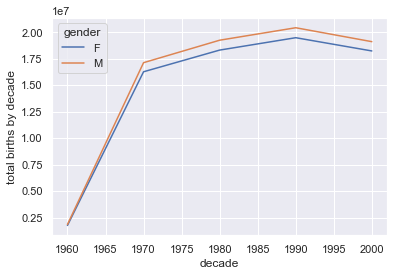

In [700]:
toplot.plot()
plt.ylabel('total births by decade')
#plt.xlabel('decade')
plt.show()


In [714]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [720]:
births.groupby('gender')['births'].sum()    #groupby isnt as functional

gender
F    74035823
M    77738555
Name: births, dtype: int64

In [727]:
births.pivot_table(values='births', index='gender', columns='month', aggfunc=np.median) 

month,1,2,3,4,5,6,7,8,9,10,11,12
gender,,,,,,,,,,,,
F,4538.0,4597.0,4592.0,4449.0,4495.0,4617.0,4838.0,4949.0,4986.0,4796.5,4584.0,4658.5
M,4742.0,4853.0,4856.0,4704.0,4739.0,4872.0,5134.5,5206.0,5234.0,5015.5,4859.0,4888.0


In [913]:
births.groupby('gender').mean()

,year,month,day,births,decade
gender,,,,,
F,1979.037423,6.513374,17.782909,9521.067773,1974.543467
M,1979.037447,6.518466,17.756872,10003.674559,1974.545104


**TIME SERIES**

In [728]:
from datetime import datetime


In [729]:
datetime(year=2015, month=7, day=10)

datetime.datetime(2015, 7, 10, 0, 0)

In [740]:
date2 = pd.to_datetime("4th of July, 2016")
date2

Timestamp('2016-07-04 00:00:00')

In [749]:
pd.date_range('2015-07-03', periods=10, freq='M')          #set the start, frequency by ymonth and show 10 periods

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30'],
              dtype='datetime64[ns]', freq='M')

In [793]:
pd.read_csv('ETH_1h.csv')

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [867]:
dparser = lambda x : pd.datetime.strptime(x, '%Y-%m-%d %I-%p')             #strptime converts string to that datetime format,   we are running strptime on x



dft=pd.read_csv('ETH_1h.csv', parse_dates=['Date'],   date_parser=dparser)          #parse the column with the dates
                     #parse columns with dates          how to parse


dft.head()

<ipython-input-867-89910bb30d86>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dparser = lambda x : pd.datetime.strptime(x, '%Y-%m-%d %I-%p')             #strptime converts string to that datetime format,   we are running strptime on x


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [801]:
dft['Date'].dt.day_name()              #get the day name

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [875]:
dft['DayOfWeek']=dft['Date'].dt.day_name()

In [803]:
dft.head()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [868]:
dft['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [808]:
dft['Date'].max()- dft['Date'].min()

Timedelta('986 days 09:00:00')

In [869]:
dft.loc[  ((dft['Date']>='2019') & (dft['Date']<'2020')) ,  :]   # you can double filter rows if you put ()

,Date,Symbol,Open,High,Low,Close,Volume
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84
...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99


In [823]:
#filter by datetime

dft.loc[ dft['Date'] >= pd.to_datetime('2019-01-01')]               #needs to be to_datetime, str to datetime

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [887]:
dft.head()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [888]:
dft.set_index('Date', inplace=True)   

In [889]:
dft['2019']    #when the date is the index you can slice directly

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [830]:
dft['2020-01':'2020-02']['Close'].mean()

195.16559027777814

In [890]:
dft['2019-12-31']['High'].max()    #highest value of that day

133.19

In [892]:
dft

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [1146]:
dft.loc[ ( dft ['DayOfWeek']=='Monday') & (dft['Close']> 200)  , : ]

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-09 23:00:00,ETHUSD,199.00,203.53,197.54,202.77,2734251.01,Monday
2020-03-09 13:00:00,ETHUSD,204.63,205.07,198.09,202.45,3863946.05,Monday
2020-03-09 12:00:00,ETHUSD,201.16,205.17,200.99,204.63,3860920.98,Monday
2020-03-09 11:00:00,ETHUSD,203.68,203.68,199.38,201.16,3145976.84,Monday
2020-03-09 10:00:00,ETHUSD,203.58,205.48,203.35,203.68,780530.33,Monday
...,...,...,...,...,...,...,...
2017-07-03 04:00:00,ETHUSD,279.20,281.08,276.40,280.43,1890547.93,Monday
2017-07-03 03:00:00,ETHUSD,281.92,282.00,277.32,279.20,1303694.47,Monday
2017-07-03 02:00:00,ETHUSD,278.13,282.83,275.00,281.92,1607656.29,Monday


**RESAMPLING     resampling breaks it down to a different time frequency**

In [ ]:
#RESAMPLE BY INDIVIDUAL COLUMN

In [907]:
HighPerDay= dft['High'].resample('D').max()                    #get the highest high on a daily freq

HighPerDay['2020-01-05']

138.97

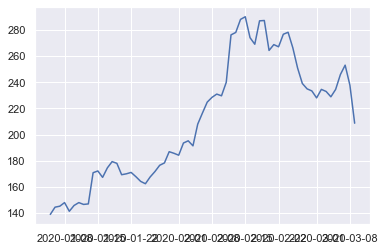

In [909]:
plt.plot(HighPerDay['2020-01-05':'2020-03-09'])
plt.show()

In [904]:
AvgClosePerYear= dft['Close'].resample('Y').mean()   #get the average close on a yearly freq
AvgClosePerYear['2019']

Date
2019-12-31    180.75203
Freq: A-DEC, Name: Close, dtype: float64

In [1119]:
open= dft['Open'].resample('M')    #resample open column by month
open.mean()


Date
2017-07-31     220.118963
2017-08-31     298.258616
2017-09-30     298.656472
2017-10-31     305.642594
2017-11-30     355.471236
2017-12-31     629.484960
2018-01-31    1083.552487
2018-02-28     872.477783
2018-03-31     630.316505
2018-04-30     515.700625
2018-05-31     676.451909
2018-06-30     519.966306
2018-07-31     461.867298
2018-08-31     323.218696
2018-09-30     226.915569
2018-10-31     207.784516
2018-11-30     168.482361
2018-12-31     107.272392
2019-01-31     127.098831
2019-02-28     124.798631
2019-03-31     135.412231
2019-04-30     164.905417
2019-05-31     217.766774
2019-06-30     273.746181
2019-07-31     248.647298
2019-08-31     199.779906
2019-09-30     185.111194
2019-10-31     178.243051
2019-11-30     173.103931
2019-12-31     137.381277
2020-01-31     155.016922
2020-02-29     237.955589
2020-03-31     209.054725
Freq: M, Name: Open, dtype: float64

In [917]:
#RESAMPLE MULTIPLE COLUMNS but apply different f(x) by column

dft.resample('W').agg( { 'Open':'mean',  'High':'max',  'Low':'min' , 'Close':'mean' , 'Volume':'sum' } )

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,293.73,253.23,268.202162,8.084631e+07
2017-07-09,261.337024,285.00,231.25,261.062083,2.246746e+08
2017-07-16,196.193214,240.33,130.26,195.698393,5.017750e+08
2017-07-23,212.351429,249.40,153.25,212.783750,7.221637e+08
2017-07-30,203.496190,229.99,178.03,203.309524,2.657305e+08
...,...,...,...,...,...
2020-02-16,255.021667,290.00,216.31,255.198452,3.912867e+08
2020-02-23,265.220833,287.13,242.36,265.321905,3.067838e+08
2020-03-01,236.720536,278.13,209.26,236.373988,3.693920e+08


In [925]:
h= dft.resample('W')    
h['Low'].min()

Date
2017-07-02    253.23
2017-07-09    231.25
2017-07-16    130.26
2017-07-23    153.25
2017-07-30    178.03
               ...  
2020-02-16    216.31
2020-02-23    242.36
2020-03-01    209.26
2020-03-08    196.00
2020-03-15     90.00
Freq: W-SUN, Name: Low, Length: 142, dtype: float64

# CUTTING AND BINNING , bins by numeric section, label by corresponding group


In [952]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,Age group
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False,Young adult
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False,Midage
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,True,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,True,Adult


In [956]:
bins= [0,18,25,35,55,75,100]

labels= ['Teen', 'Young adult', 'Adult', 'Midage', 'Old', 'Senior Citizen']
        #0-18       18-25        25-35    35-55     55-75    75-100

titanic['Age group']=  pd.cut (titanic.age, bins=bins, labels= labels)
                     # cut by   column cut  buckets   lebels

titanic.head()

,survived,sex,age,fare,class,adult_male,embark_town,alive,alone,Age group
0,0,male,22.0,7.2500,Third,True,Southampton,no,False,Young adult
1,1,female,38.0,71.2833,First,False,Cherbourg,yes,False,Midage
2,1,female,26.0,7.9250,Third,False,Southampton,yes,True,Adult
3,1,female,35.0,53.1000,First,False,Southampton,yes,False,Adult
4,0,male,35.0,8.0500,Third,True,Southampton,no,True,Adult


In [964]:
bins2= [-1, 0.9, 1, 2]

labels2= ['dead', 'alive', 'surv']                          #we pass survive only because it is required, it will not show
          # -1to.9   .9to1   1to2


titanic['dead/alive'] = pd.cut(titanic['survived'], bins=bins2 , labels= labels2)


titanic.drop(columns=['alive'], inplace=True)
titanic.head()

,survived,sex,age,fare,class,adult_male,embark_town,alone,Age group,dead/alive
0,0,male,22.0,7.2500,Third,True,Southampton,False,Young adult,dead
1,1,female,38.0,71.2833,First,False,Cherbourg,False,Midage,alive
2,1,female,26.0,7.9250,Third,False,Southampton,True,Adult,alive
3,1,female,35.0,53.1000,First,False,Southampton,False,Adult,alive
4,0,male,35.0,8.0500,Third,True,Southampton,True,Adult,dead


In [965]:
titanic.groupby('embark_town') ['dead/alive'].value_counts()

embark_town  dead/alive
Cherbourg    alive          93
             dead           75
Queenstown   dead           47
             alive          30
Southampton  dead          427
             alive         217
Name: dead/alive, dtype: int64

dfname.to_csv         send df back to a new csv file

dfnameto_csv('filename.tsv', sep=''\t')  seperated by tab

---------------------------------



excel: pip install xlwt xlrd
 
titanic .to_excel('titanic.xlsx')

pd.read_excel ('name.xlsx', index_col='column you want as the index')

-------------------------------------


df.to_json('name.json',   orient='Record' , lines=True)

pd.read_json('name.json', orient='Record' , lines=True )

----------------------------------------------

sql:  pip install  SQLALchemy
pip install psycopg2-binary

connect to database:
from sqlalchemy import create_engine
import psychopg2

engine= create_engine('postgressql')



**MATPLOTLIB**

In [1148]:
%matplotlib inline



**LINE TYPE AND COLOR**

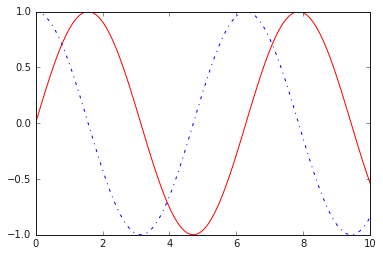

In [1154]:
x= np.linspace(0,10, 100)

plt.plot(x, np.sin(x), color='red')
       

plt.plot(x,np.cos(x), linestyle= 'dashdot', color='blue')


#to save figure: fig.savefig('name.png')

**AXES LIMITS**

(-1.0, 11.0, -1.5, 2.0)

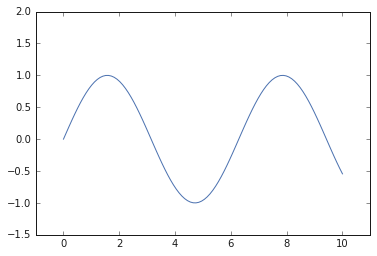

In [1160]:
plt.plot(x, np.sin(x))
plt.xlim(0,11)
plt.ylim(-1.5,2)

#or:

plt.axis([-1,11, -1.5,2])

Text(0.5, 1.0, 'A sine curve')

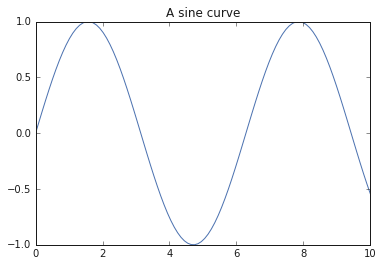

In [1173]:
plt.plot(x, np.sin(x))
plt.title('A sine curve')

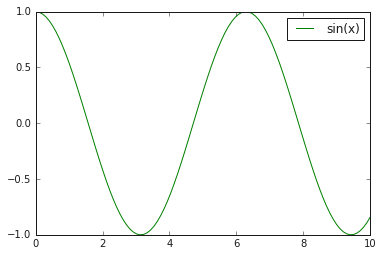

In [1179]:
plt.plot(x, np.cos(x), label= 'sin(x)', color = 'green')
plt.legend()


[(-2.0, 2.0),
 Text(0, 0.5, 'sin(x)'),
 (0.0, 10.0),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, ' plot of sin(x)')]

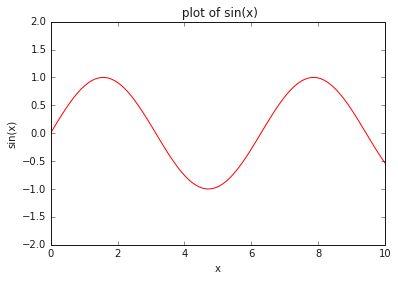

In [1182]:
# set an axes so you can set all parameters in one line

ax= plt.axes()
ax.plot(x, np.sin(x), color='red')

ax.set(xlim=(0,10), ylim=(-2,2), xlabel='x', ylabel='sin(x)',  title=' plot of sin(x)')              

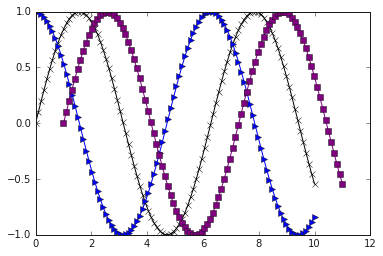

In [1218]:
#different markers for plots

plt.plot(x,np.sin(x), marker='x', color='black', alpha=5)

plt.plot(x, np.cos(x), marker='>', color='blue')

plt.plot(x+1, np.sin(x), marker= 's', color='purple')

**SCATTERPLOTS**

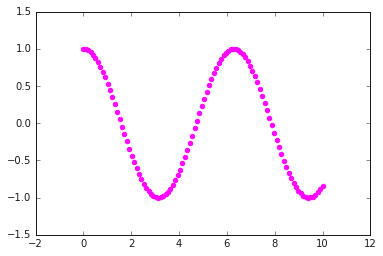

In [1216]:
plt.scatter(x,np.cos(x), marker='o', alpha=.95, color='magenta')

**Histograms, binning and density**

(array([  4.,  13.,  47., 107., 185., 255., 201., 119.,  51.,  18.]),
 array([-3.29209513, -2.70801063, -2.12392614, -1.53984164, -0.95575714,
        -0.37167265,  0.21241185,  0.79649635,  1.38058085,  1.96466534,
         2.54874984]),
 <a list of 10 Patch objects>)

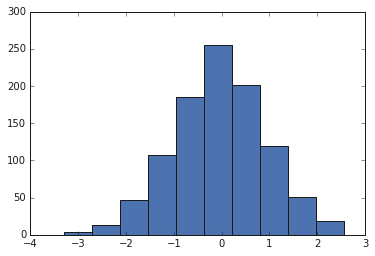

In [1241]:
data= np.random.randn(1000)
plt.hist(data)

(array([ 1.,  1.,  2.,  4.,  2.,  7.,  9., 12., 26., 29., 36., 42., 47.,
        69., 69., 79., 97., 79., 72., 76., 53., 46., 42., 31., 21., 13.,
        17.,  5.,  8.,  5.]),
 array([-3.29209513, -3.0974003 , -2.90270547, -2.70801063, -2.5133158 ,
        -2.31862097, -2.12392614, -1.9292313 , -1.73453647, -1.53984164,
        -1.34514681, -1.15045197, -0.95575714, -0.76106231, -0.56636748,
        -0.37167265, -0.17697781,  0.01771702,  0.21241185,  0.40710668,
         0.60180152,  0.79649635,  0.99119118,  1.18588601,  1.38058085,
         1.57527568,  1.76997051,  1.96466534,  2.15936018,  2.35405501,
         2.54874984]),
 <a list of 1 Patch objects>)

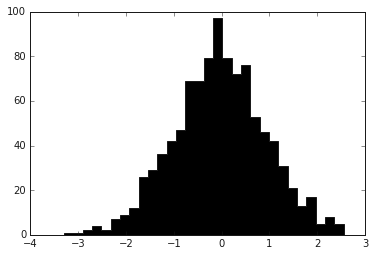

In [1245]:
plt.hist(data, bins=30,  color='black', histtype='stepfilled')

**Labels and LEGENDS**

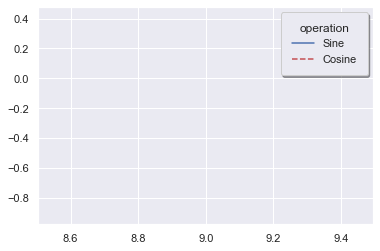

In [11]:
xx= np.linspace (0,10,1000)
ax= plt.axes()

ax.plot(x, np.sin(x), '-b', label='Sine')

ax.plot(x, np.cos(x), '--r', label='Cosine')

ax.legend(loc='best', shadow=True, borderpad=True , title='operation')